In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

In [4]:
import seaborn as sns
sns.set()

In [54]:
import numpy as np

In [3]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0) AppleWebKit/600.1.17\
 (KHTML, like Gecko) Version/8.0 Safari/600.1.17'

In [4]:
dataset_url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_candidato_munzona/votacao_candidato_munzona_2018.zip'

In [5]:
file_to_extract = 'votacao_candidato_munzona_2018_BRASIL.csv'

In [6]:
os.chdir('C:\\Users\\rgarcia\\Documents\\data')

In [7]:
os.listdir()[0:10]

['bands.csv',
 'Biomas',
 'brasil_coverage_2021.tif',
 'brasil_coverage_2021.tif.aux.xml',
 'brazil-states.geojson',
 'brazil-states_lo_res.json',
 'brazil_forests.pgw',
 'candidato_redes_total.csv',
 'cargo.csv',
 'consulta_cand_2018_BRASIL.csv']

In [8]:
# os.system(f'wget --header="User-Agent: {user_agent}" {dataset_url}')

In [9]:
# os.system(f'unzip -p {dataset_url.split('/')[-1]} {file_to_extract} > {file_to_extract}')

In [10]:
# os.remove(dataset_url.split('/')[-1])

In [11]:
# Cell below takes about a minute to run

In [12]:
df = pd.read_csv(file_to_extract, sep=';', encoding='ISO-8859-1', decimal=',', thousands='.')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8671350 entries, 0 to 8671349
Data columns (total 38 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   DT_GERACAO                object
 1   HH_GERACAO                object
 2   ANO_ELEICAO               int64 
 3   CD_TIPO_ELEICAO           int64 
 4   NM_TIPO_ELEICAO           object
 5   NR_TURNO                  int64 
 6   CD_ELEICAO                int64 
 7   DS_ELEICAO                object
 8   DT_ELEICAO                object
 9   TP_ABRANGENCIA            object
 10  SG_UF                     object
 11  SG_UE                     object
 12  NM_UE                     object
 13  CD_MUNICIPIO              int64 
 14  NM_MUNICIPIO              object
 15  NR_ZONA                   int64 
 16  CD_CARGO                  int64 
 17  DS_CARGO                  object
 18  SQ_CANDIDATO              int64 
 19  NR_CANDIDATO              int64 
 20  NM_CANDIDATO              object
 21  NM_URNA_

In [14]:
df = df.query('NR_TURNO == 1')

In [15]:
df = df.query('DS_CARGO == "Governador"')

In [16]:
df = df.query('SG_UF == "SP"')

In [23]:
resultado = df.groupby('NM_URNA_CANDIDATO').QT_VOTOS_NOMINAIS.sum().reset_index().sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)

In [28]:
segundo_turno = resultado[:2].NM_URNA_CANDIDATO.to_list()

In [58]:
segundo_turno

['JOÃO DORIA', 'MARCIO FRANÇA']

In [61]:
eliminados = [i for i in resultado.NM_URNA_CANDIDATO.to_list() if i not in segundo_turno]

In [62]:
eliminados

['PAULO SKAF',
 'LUIZ MARINHO',
 'MAJOR COSTA E SILVA',
 'ROGERIO CHEQUER',
 'RODRIGO TAVARES',
 'PROFESSORA LISETE',
 'PROF. CLAUDIO FERNANDO',
 'TONINHO FERREIRA']

In [35]:
df = df[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'QT_VOTOS_NOMINAIS']]

In [36]:
agrupa = df.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO', 'NM_URNA_CANDIDATO']).QT_VOTOS_NOMINAIS.sum()

In [40]:
agrupa = agrupa.reset_index()

In [42]:
agrupa.head(20)

CD_MUNICIPIO                NM_MUNICIPIO       NM_URNA_CANDIDATO  \
0          61000  EUCLIDES DA CUNHA PAULISTA              JOÃO DORIA   
1          61000  EUCLIDES DA CUNHA PAULISTA            LUIZ MARINHO   
2          61000  EUCLIDES DA CUNHA PAULISTA     MAJOR COSTA E SILVA   
3          61000  EUCLIDES DA CUNHA PAULISTA           MARCIO FRANÇA   
4          61000  EUCLIDES DA CUNHA PAULISTA              PAULO SKAF   
5          61000  EUCLIDES DA CUNHA PAULISTA  PROF. CLAUDIO FERNANDO   
6          61000  EUCLIDES DA CUNHA PAULISTA       PROFESSORA LISETE   
7          61000  EUCLIDES DA CUNHA PAULISTA         RODRIGO TAVARES   
8          61000  EUCLIDES DA CUNHA PAULISTA         ROGERIO CHEQUER   
9          61000  EUCLIDES DA CUNHA PAULISTA        TONINHO FERREIRA   
10         61018                  ADAMANTINA              JOÃO DORIA   
11         61018                  ADAMANTINA            LUIZ MARINHO   
12         61018                  ADAMANTINA     MAJOR COSTA E SILVA   
13         61018                  ADAMANTINA           MARCIO FRANÇA   
14         61018                  ADAMANTINA              PAULO SKAF   
15         61018                  ADAMANTINA  PROF. CLAUDIO FERNANDO   
16         61018                  ADAMANTINA       PROFESSORA LISETE   
17         61018                  ADAMANTINA         RODRIGO TAVARES   
18         61018                  ADAMANTINA         ROGERIO CHEQUER   
19         61018                  ADAMANTINA        TONINHO FERREIRA   

    QT_VOTOS_NOMINAIS  
0                1174  
1                1710  
2                  50  
3                 677  
4                 533  
5                   4  
6                  10  
7                  75  
8                  24  
9                   2  
10               6371  
11                906  
12                694  
13               4487  
14               3183  
15                  6  
16                134  
17                383  
18                246  
19                  5

In [ ]:
agrupa

In [47]:
pivota = agrupa.pivot(index=(['CD_MUNICIPIO', 'NM_MUNICIPIO']), columns='NM_URNA_CANDIDATO', values='QT_VOTOS_NOMINAIS').reset_index()

In [48]:
pivota

NM_URNA_CANDIDATO  CD_MUNICIPIO                NM_MUNICIPIO  JOÃO DORIA  \
0                         61000  EUCLIDES DA CUNHA PAULISTA      1174.0   
1                         61018                  ADAMANTINA      6371.0   
2                         61026                      BOREBI       489.0   
3                         61034                      ADOLFO       830.0   
4                         61042                      TARUMÃ      2804.0   
..                          ...                         ...         ...   
640                       72397                   VIRADOURO      3013.0   
641                       72419        VISTA ALEGRE DO ALTO      1361.0   
642                       72435                  VOTORANTIM     20056.0   
643                       72451                 VOTUPORANGA     16704.0   
644                       72737      VARGEM GRANDE PAULISTA      8984.0   

NM_URNA_CANDIDATO  LUIZ MARINHO  MAJOR COSTA E SILVA  MARCIO FRANÇA  \
0                        1710.0                 50.0          677.0   
1                         906.0                694.0         4487.0   
2                         222.0                 60.0          266.0   
3                         213.0                101.0          497.0   
4                         540.0                271.0         2417.0   
..                          ...                  ...            ...   
640                       674.0                409.0         1710.0   
641                       426.0                147.0          623.0   
642                      7455.0               3460.0         7409.0   
643                      3005.0               1565.0         6924.0   
644                      2820.0                713.0         4592.0   

NM_URNA_CANDIDATO  PAULO SKAF  PROF. CLAUDIO FERNANDO  PROFESSORA LISETE  \
0                       533.0                     4.0               10.0   
1                      3183.0                     6.0              134.0   
2                       426.0                     1.0               13.0   
3                       600.0                     1.0               16.0   
4                       883.0                     3.0               50.0   
..                        ...                     ...                ...   
640                    1594.0                     4.0               86.0   
641                     406.0                     4.0               51.0   
642                   10067.0                    68.0             1840.0   
643                   11908.0                    35.0              449.0   
644                    4523.0                    22.0              514.0   

NM_URNA_CANDIDATO  RODRIGO TAVARES  ROGERIO CHEQUER  TONINHO FERREIRA  
0                             75.0             24.0               2.0  
1                            383.0            246.0               5.0  
2                             31.0             12.0               NaN  
3                             71.0             24.0               NaN  
4                            143.0             71.0               5.0  
..                             ...              ...               ...  
640                          298.0            106.0               2.0  
641                           82.0             63.0               1.0  
642                         2912.0           1560.0              31.0  
643                         1055.0            794.0               9.0  
644                          696.0            686.0              16.0  

[645 rows x 12 columns]

In [49]:
# select numeric columns
numeric_columns = pivota.select_dtypes(include=['number']).columns

In [52]:
# fill 0 to all NaN 
pivota[numeric_columns] = pivota[numeric_columns].fillna(0)

In [55]:
# convert all floats to ints
m = pivota.select_dtypes(np.number)
pivota[m.columns]= m.round().astype('Int64')

In [68]:
pivota.rename(columns={'CD_MUNICIPIO':'codigo_tse'}, inplace=True)

In [63]:
# IBGE to TSE conversion table
# https://github.com/betafcc/Municipios-Brasileiros-TSE/raw/master/municipios_brasileiros_tse.csv

In [64]:
ibge = pd.read_csv('https://github.com/betafcc/Municipios-Brasileiros-TSE/raw/master/municipios_brasileiros_tse.csv')

In [65]:
ibge = ibge[['codigo_tse', 'codigo_ibge']]

In [69]:
pivota = pivota.merge(ibge, how='left', on='codigo_tse')

In [70]:
pivota

codigo_tse                NM_MUNICIPIO  JOÃO DORIA  LUIZ MARINHO  \
0         61000  EUCLIDES DA CUNHA PAULISTA        1174          1710   
1         61018                  ADAMANTINA        6371           906   
2         61026                      BOREBI         489           222   
3         61034                      ADOLFO         830           213   
4         61042                      TARUMÃ        2804           540   
..          ...                         ...         ...           ...   
640       72397                   VIRADOURO        3013           674   
641       72419        VISTA ALEGRE DO ALTO        1361           426   
642       72435                  VOTORANTIM       20056          7455   
643       72451                 VOTUPORANGA       16704          3005   
644       72737      VARGEM GRANDE PAULISTA        8984          2820   

     MAJOR COSTA E SILVA  MARCIO FRANÇA  PAULO SKAF  PROF. CLAUDIO FERNANDO  \
0                     50            677         533                       4   
1                    694           4487        3183                       6   
2                     60            266         426                       1   
3                    101            497         600                       1   
4                    271           2417         883                       3   
..                   ...            ...         ...                     ...   
640                  409           1710        1594                       4   
641                  147            623         406                       4   
642                 3460           7409       10067                      68   
643                 1565           6924       11908                      35   
644                  713           4592        4523                      22   

     PROFESSORA LISETE  RODRIGO TAVARES  ROGERIO CHEQUER  TONINHO FERREIRA  \
0                   10               75               24                 2   
1                  134              383              246                 5   
2                   13               31               12                 0   
3                   16               71               24                 0   
4                   50              143               71                 5   
..                 ...              ...              ...               ...   
640                 86              298              106                 2   
641                 51               82               63                 1   
642               1840             2912             1560                31   
643                449             1055              794                 9   
644                514              696              686                16   

     codigo_ibge  
0        3515350  
1        3500105  
2        3507456  
3        3500204  
4        3553955  
..           ...  
640      3556800  
641      3556909  
642      3557006  
643      3557105  
644      3556453  

[645 rows x 13 columns]

In [ ]:
# agora puxa os votos brancos do dataset separado

In [73]:
df2 = pd.read_csv('detalhe_votacao_munzona_2018_BRASIL.csv', sep=';', encoding='ISO-8859-1', decimal=',', thousands='.')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DT_GERACAO                   46578 non-null  object
 1   HH_GERACAO                   46578 non-null  object
 2   ANO_ELEICAO                  46578 non-null  int64 
 3   CD_TIPO_ELEICAO              46578 non-null  int64 
 4   NM_TIPO_ELEICAO              46578 non-null  object
 5   NR_TURNO                     46578 non-null  int64 
 6   CD_ELEICAO                   46578 non-null  int64 
 7   DS_ELEICAO                   46578 non-null  object
 8   DT_ELEICAO                   46578 non-null  object
 9   TP_ABRANGENCIA               46578 non-null  object
 10  SG_UF                        46578 non-null  object
 11  SG_UE                        46578 non-null  object
 12  NM_UE                        46578 non-null  object
 13  CD_MUNICIPIO                 46

In [49]:
mun = gpd.read_file(r'C:\Users\rgarcia\Documents\Data\municipios_hires.geojson')

In [52]:
mun.columns = ['codigo_ibge', 'name', 'description', 'geometry']

In [54]:
mun.head()

codigo_ibge                   name            description  \
0     1100015  Alta Floresta D'Oeste  Alta Floresta D'Oeste   
1     1100023              Ariquemes              Ariquemes   
2     1100031                 Cabixi                 Cabixi   
3     1100049                 Cacoal                 Cacoal   
4     1100056             Cerejeiras             Cerejeiras   

                                            geometry  
0  POLYGON ((-62.18209 -11.86686, -62.16230 -11.8...  
1  POLYGON ((-62.53595 -9.73182, -62.50782 -9.754...  
2  POLYGON ((-60.39940 -13.45584, -60.40195 -13.4...  
3  POLYGON ((-61.00051 -11.39796, -61.01794 -11.4...  
4  POLYGON ((-61.50047 -13.00392, -61.47901 -13.0...

In [60]:
pivota['codigo_ibge'] = pivota.codigo_ibge.astype(str)

In [62]:
bozomap = mun.merge(pivota, on='codigo_ibge', how='left')

In [67]:
bozomap = bozomap[['codigo_ibge', 'name', 'SG_UF', 'FERNANDO HADDAD', 'JAIR BOLSONARO', 'BOLSONARO_PCT', 'geometry']]

In [69]:
bozomap.columns = ['codigo_ibge', 'Município', 'UF', 'Haddad', 'Bolsonaro',
       'Bolsonaro_pct', 'geometry']

In [91]:
sns.set_theme(style='whitegrid')

In [84]:
blue_white_red = sns.color_palette("vlag_r", as_cmap=True)

<AxesSubplot:>

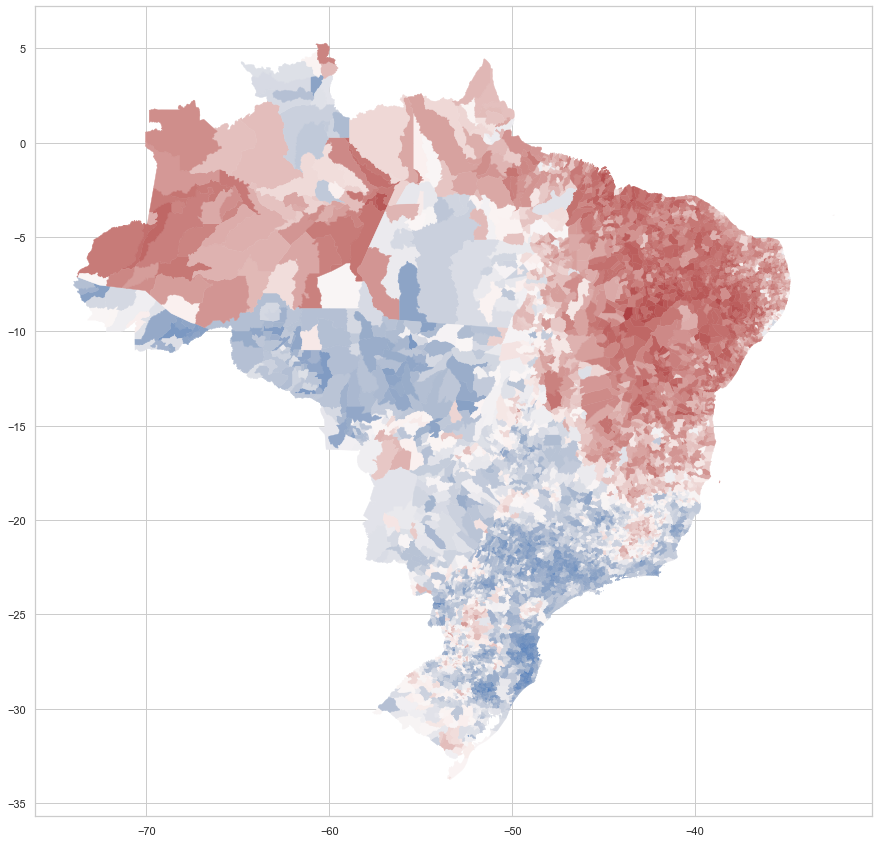

In [118]:
bozomap.plot(column='Bolsonaro_pct', cmap=blue_white_red, edgecolor="face", linewidth=0.4, figsize=(15,15),vmin=0,vmax=100)

In [ ]:
bozomap.plot(column='Bolsonaro_pct', cmap=blue_white_red, edgecolor="face", linewidth=0.4, figsize=(15,15))

<AxesSubplot:>

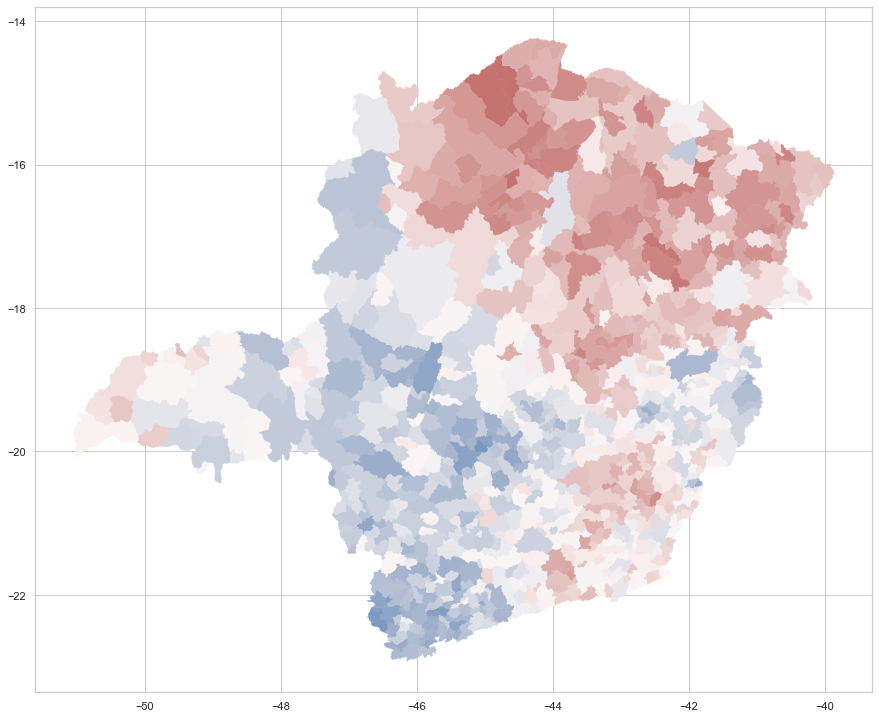

In [121]:
bozomap[bozomap.codigo_ibge.apply(lambda x: x[0:2]) == '31']\
    .plot(column='Bolsonaro_pct', 
          cmap=blue_white_red, 
          edgecolor="face", 
          linewidth=0.4, figsize=(15,15),
         vmin=0, vmax=100)

In [116]:
pivota

codigo_tse               NM_MUNICIPIO SG_UF  FERNANDO HADDAD  \
0          87220                 NOVA PÁDUA    RS              134   
1          82937                RIO FORTUNA    SC              380   
2          83577                      TIMBÓ    SC             2615   
3          80330                    ASCURRA    SC              506   
4          83615              TREZE DE MAIO    SC              543   
...          ...                        ...   ...              ...   
5565       10260           FARTURA DO PIAUÍ    PI             2978   
5566       10081            BONFIM DO PIAUÍ    PI             3241   
5567       23167       CARNAUBEIRA DA PENHA    PE             7402   
5568       10707  CAPITÃO GERVÁSIO OLIVEIRA    PI             2667   
5569       10804                   GUARIBAS    PI             2879   

      JAIR BOLSONARO  BOLSONARO_PCT codigo_ibge  
0               1770         92.962     4313086  
1               3283         89.626     4214904  
2              22582         89.622     4218202  
3               4257         89.376     4201703  
4               4503         89.239     4218400  
...              ...            ...         ...  
5565             166          5.280     2203750  
5566             179          5.234     2201929  
5567             371          4.773     2603926  
5568             121          4.340     2202455  
5569              59          2.008     2204550  

[5570 rows x 7 columns]

In [65]:
os.getcwd()

'C:\\Users\\rgarcia\\Documents\\data'

In [66]:
pivota.to_excel("Haddad_vs_Bolsonaro.xlsx")  

In [78]:
((pivota['Votos Bolsonaro'].sum()/(pivota['Votos Haddad'].sum()+pivota['Votos Bolsonaro'].sum()))*100).round(1)

55.1